# [Time Series Data Visualization with Python](https://machinelearningmastery.com/time-series-data-visualization-with-python/)

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

series = read_csv('F:/YJ-format-230125/notebooks/20230302WS/data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

c:\app\anaconda3\envs\yjformat\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\app\anaconda3\envs\yjformat\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\app\anaconda3\envs\yjformat\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_26560\3680815482.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('F:/YJ-format-230125/notebooks/20230302WS/data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


### 1. Time Series Line Plot

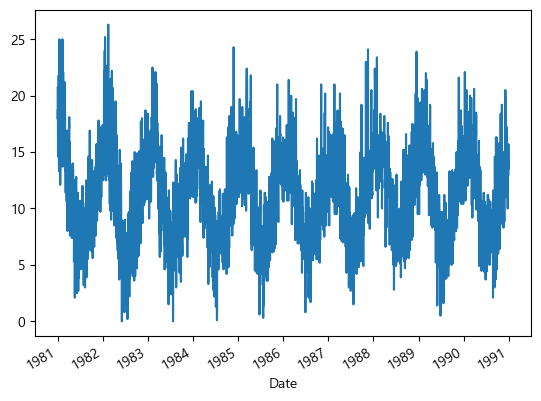

In [117]:
series.plot()
pyplot.show()

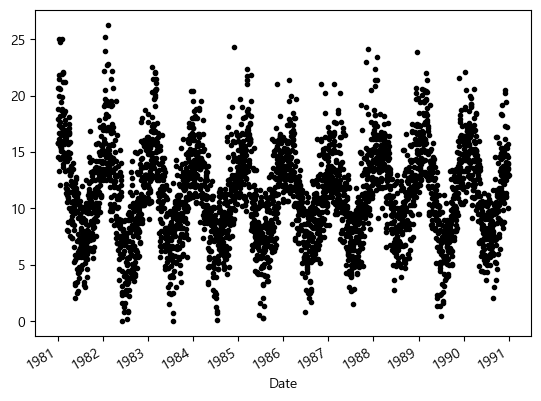

In [118]:
series.plot(style='k.')
pyplot.show()

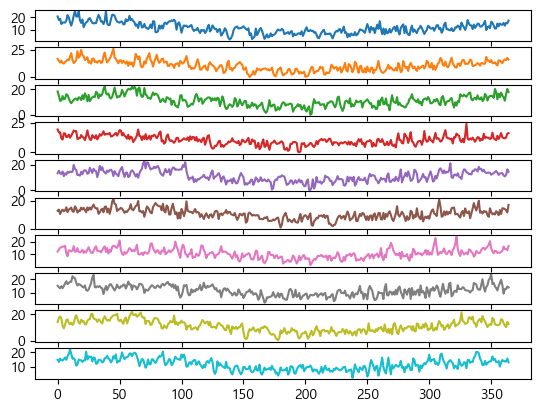

In [119]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years.plot(subplots=True, legend=False)
pyplot.show()

### 2. Time Series Line Plot

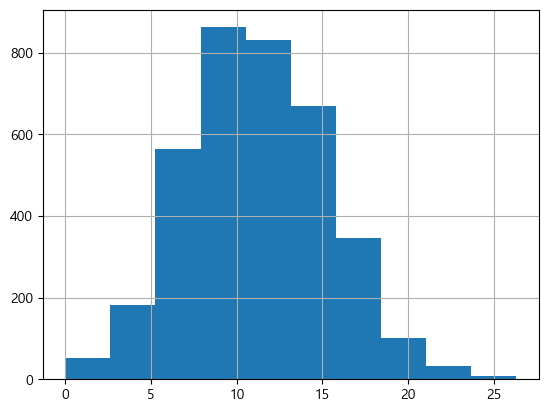

In [121]:
series.hist()
pyplot.show()

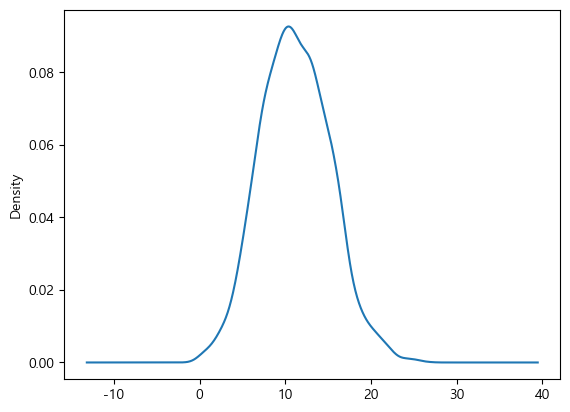

In [122]:
series.plot(kind='kde')
pyplot.show()

### 3. Time Series Box and Whisker Plots by Interval

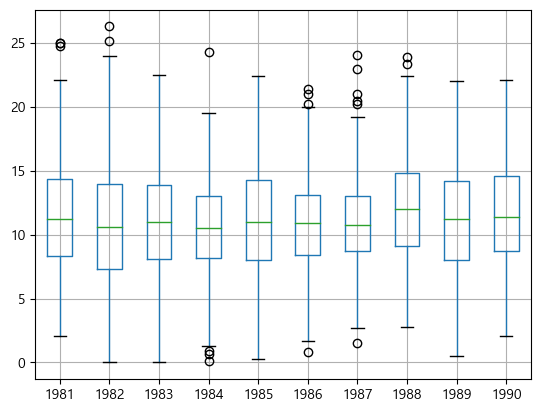

In [135]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

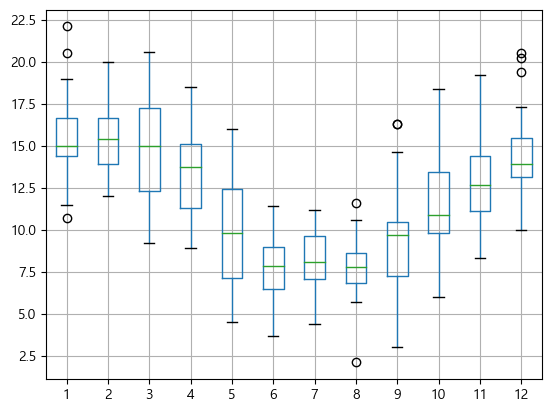

In [136]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

### 4. Time Series Heat Maps

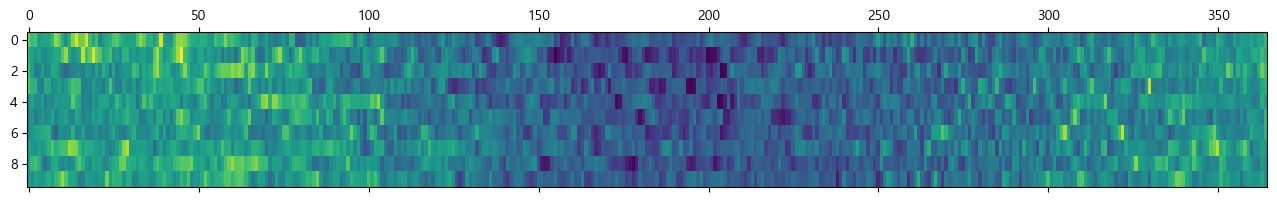

In [125]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

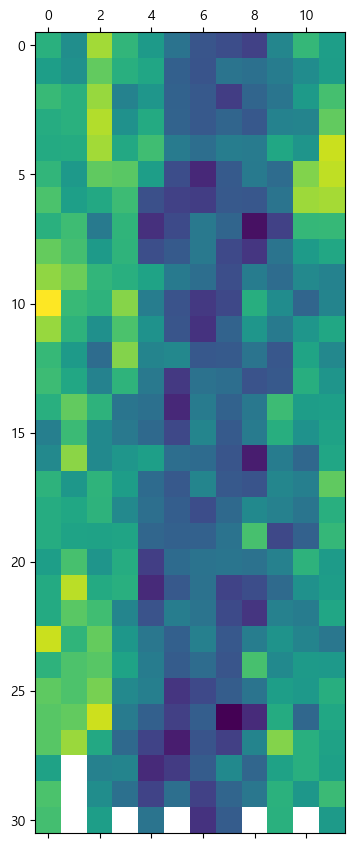

In [126]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

### 5. Time Series Lag Scatter Plots

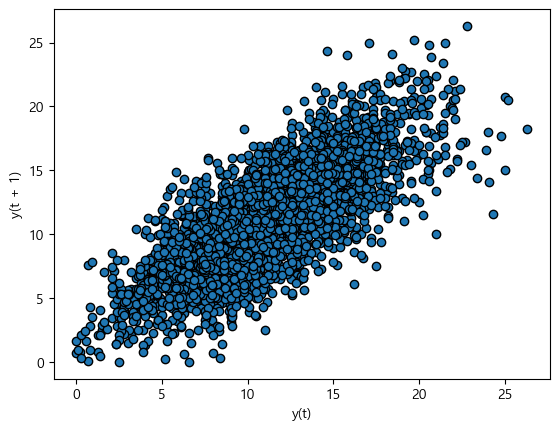

In [133]:
lag_plot(series, edgecolor='k')
pyplot.show()

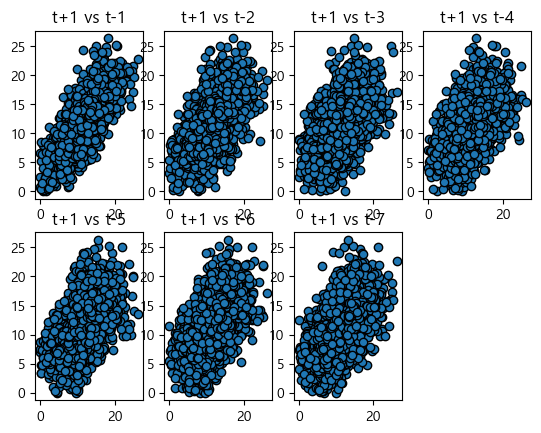

In [132]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
    
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
    
dataframe.columns = columns
pyplot.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values, edgecolor='k')
pyplot.show()

### 6. Time Series Autocorrelation Plots

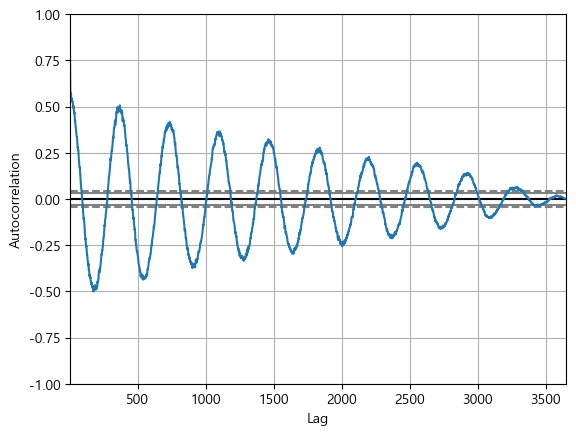

In [134]:
autocorrelation_plot(series)
pyplot.show()

### 9. Further Reading

- [Time Series Data Visualization with Python](https://machinelearningmastery.com/time-series-data-visualization-with-python/)